In [2]:
from SEAM.utils import *
import SEAM
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
sns.set_style('white')
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 2}

# matplotlib.rc('font', **font)
# matplotlib.rcParams.update({'font.size': 2})

import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/SEAM/datasets.py:88: RuntimeWarning: invalid value encountered in double_scalars
  cur_normed_var = cur_var/np.mean(cur_col)


setting obsm: spatial


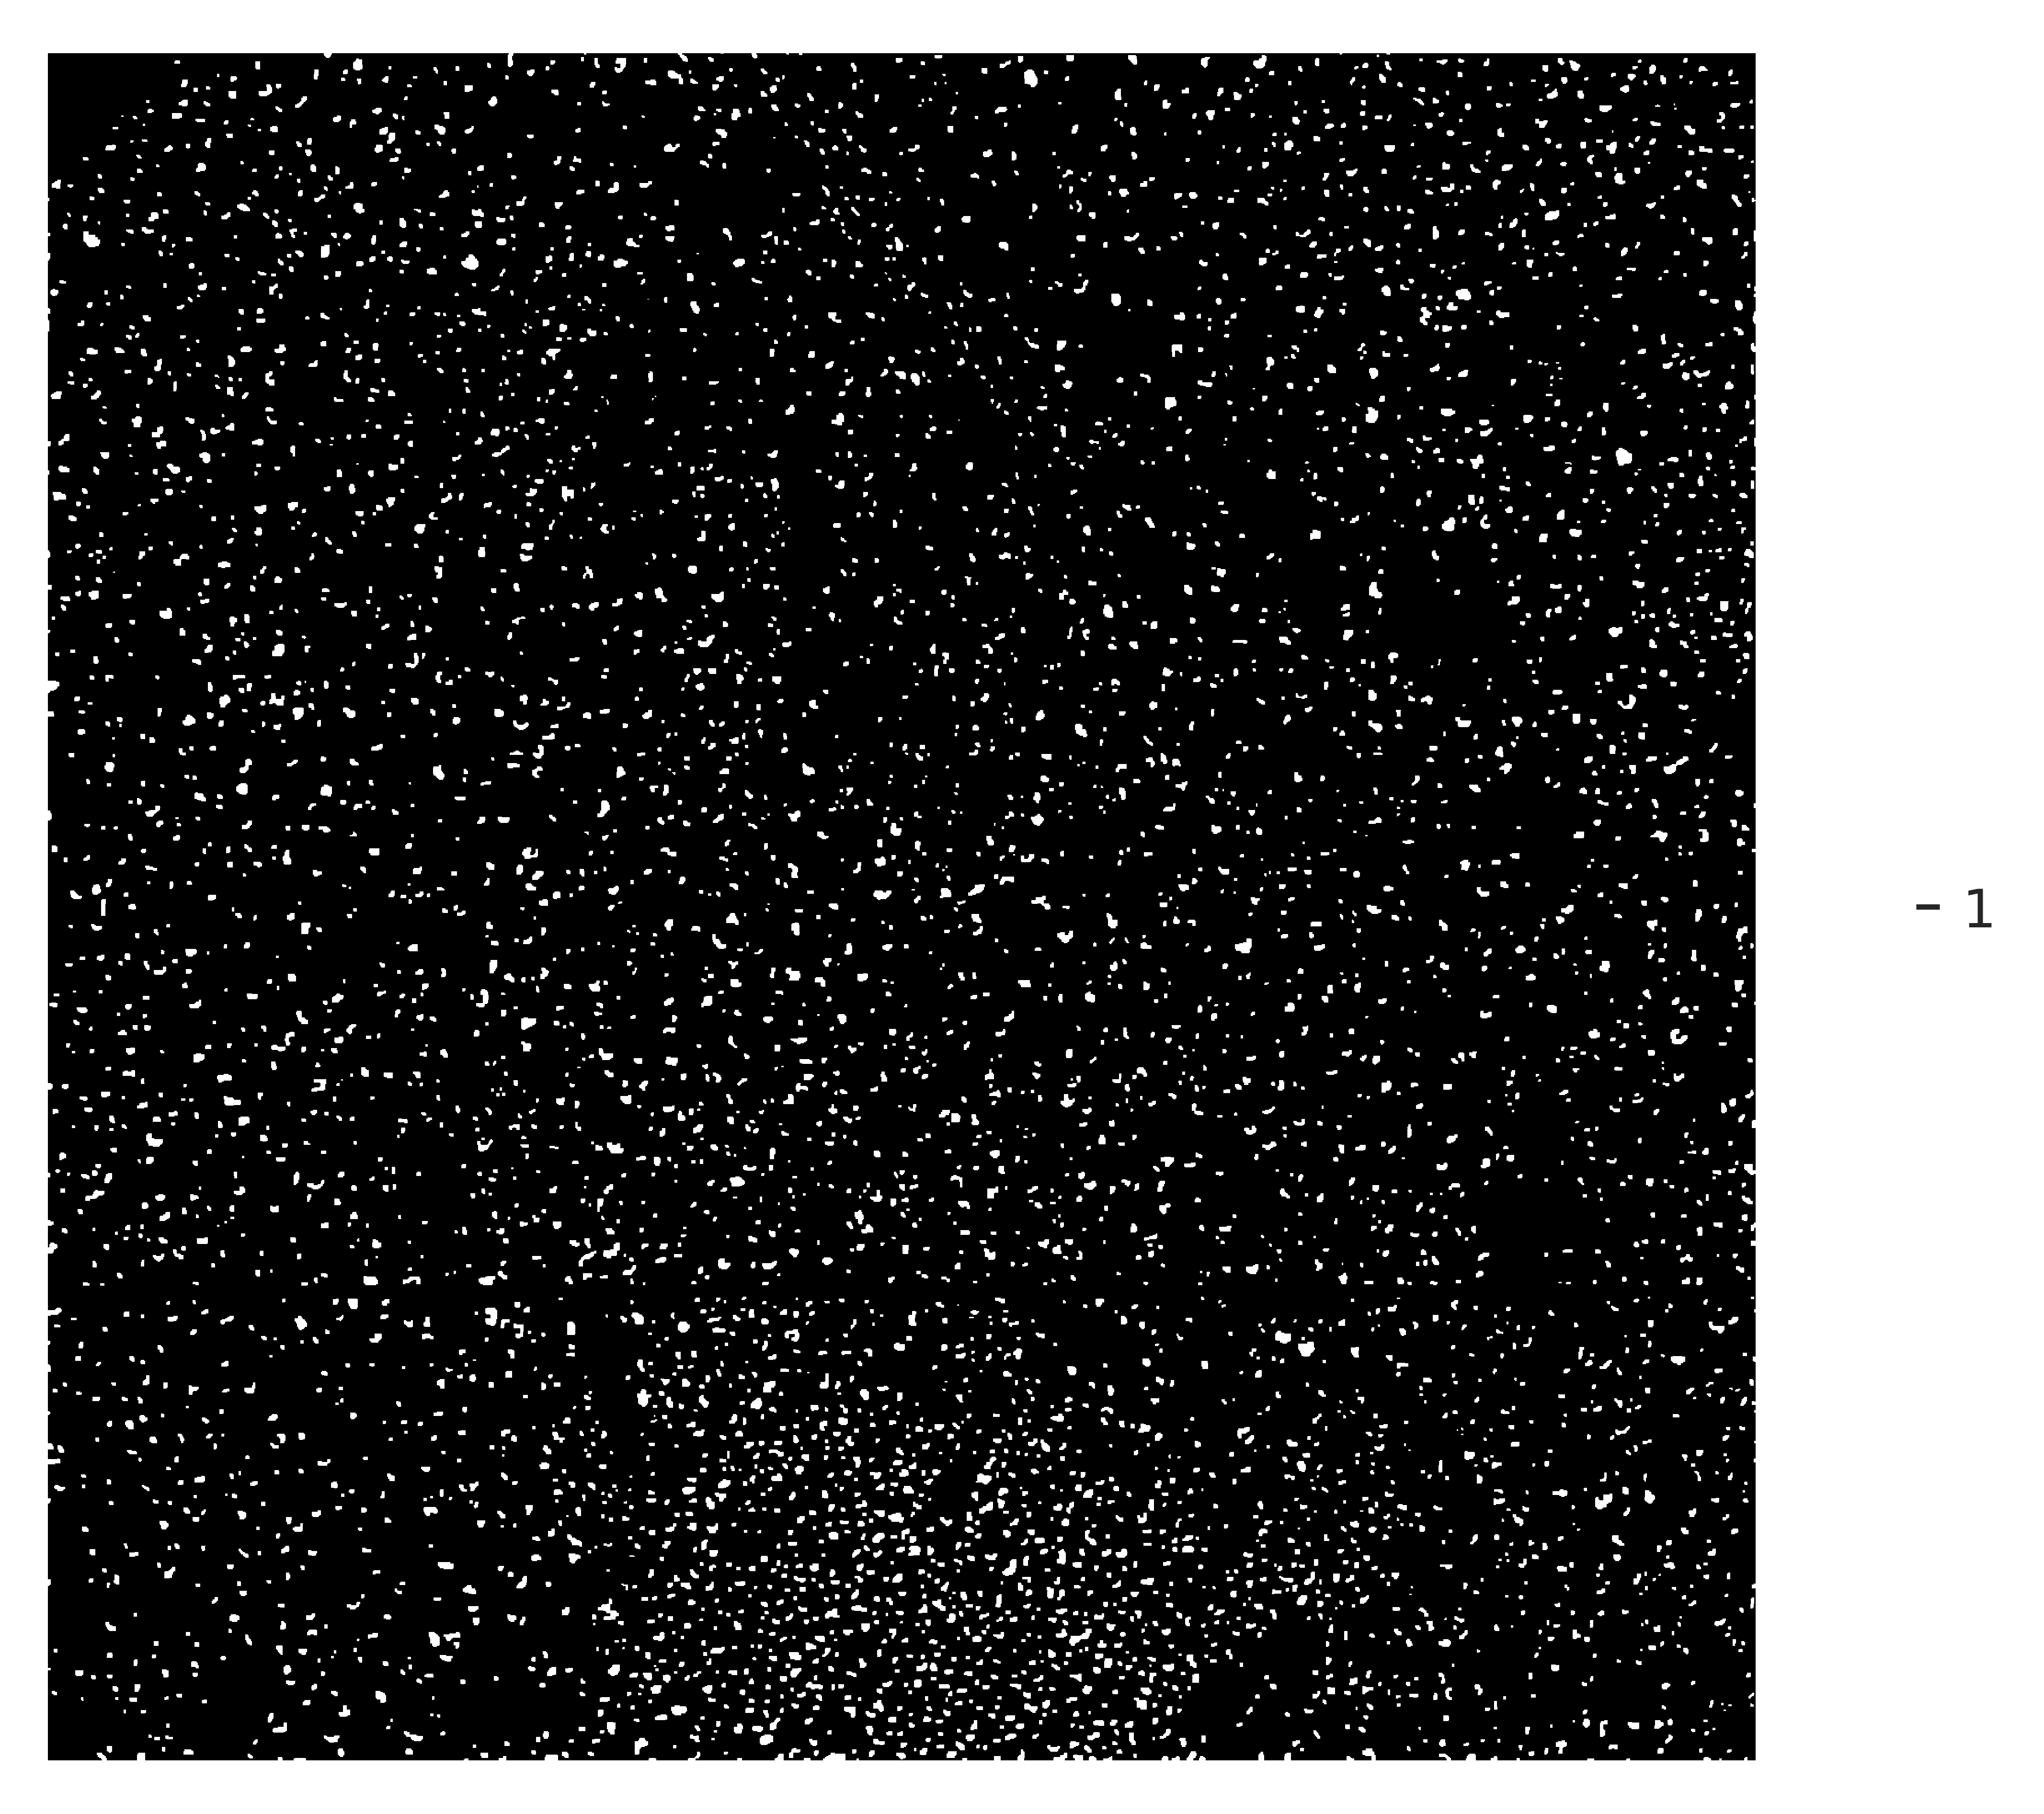

setting obsm: spatial


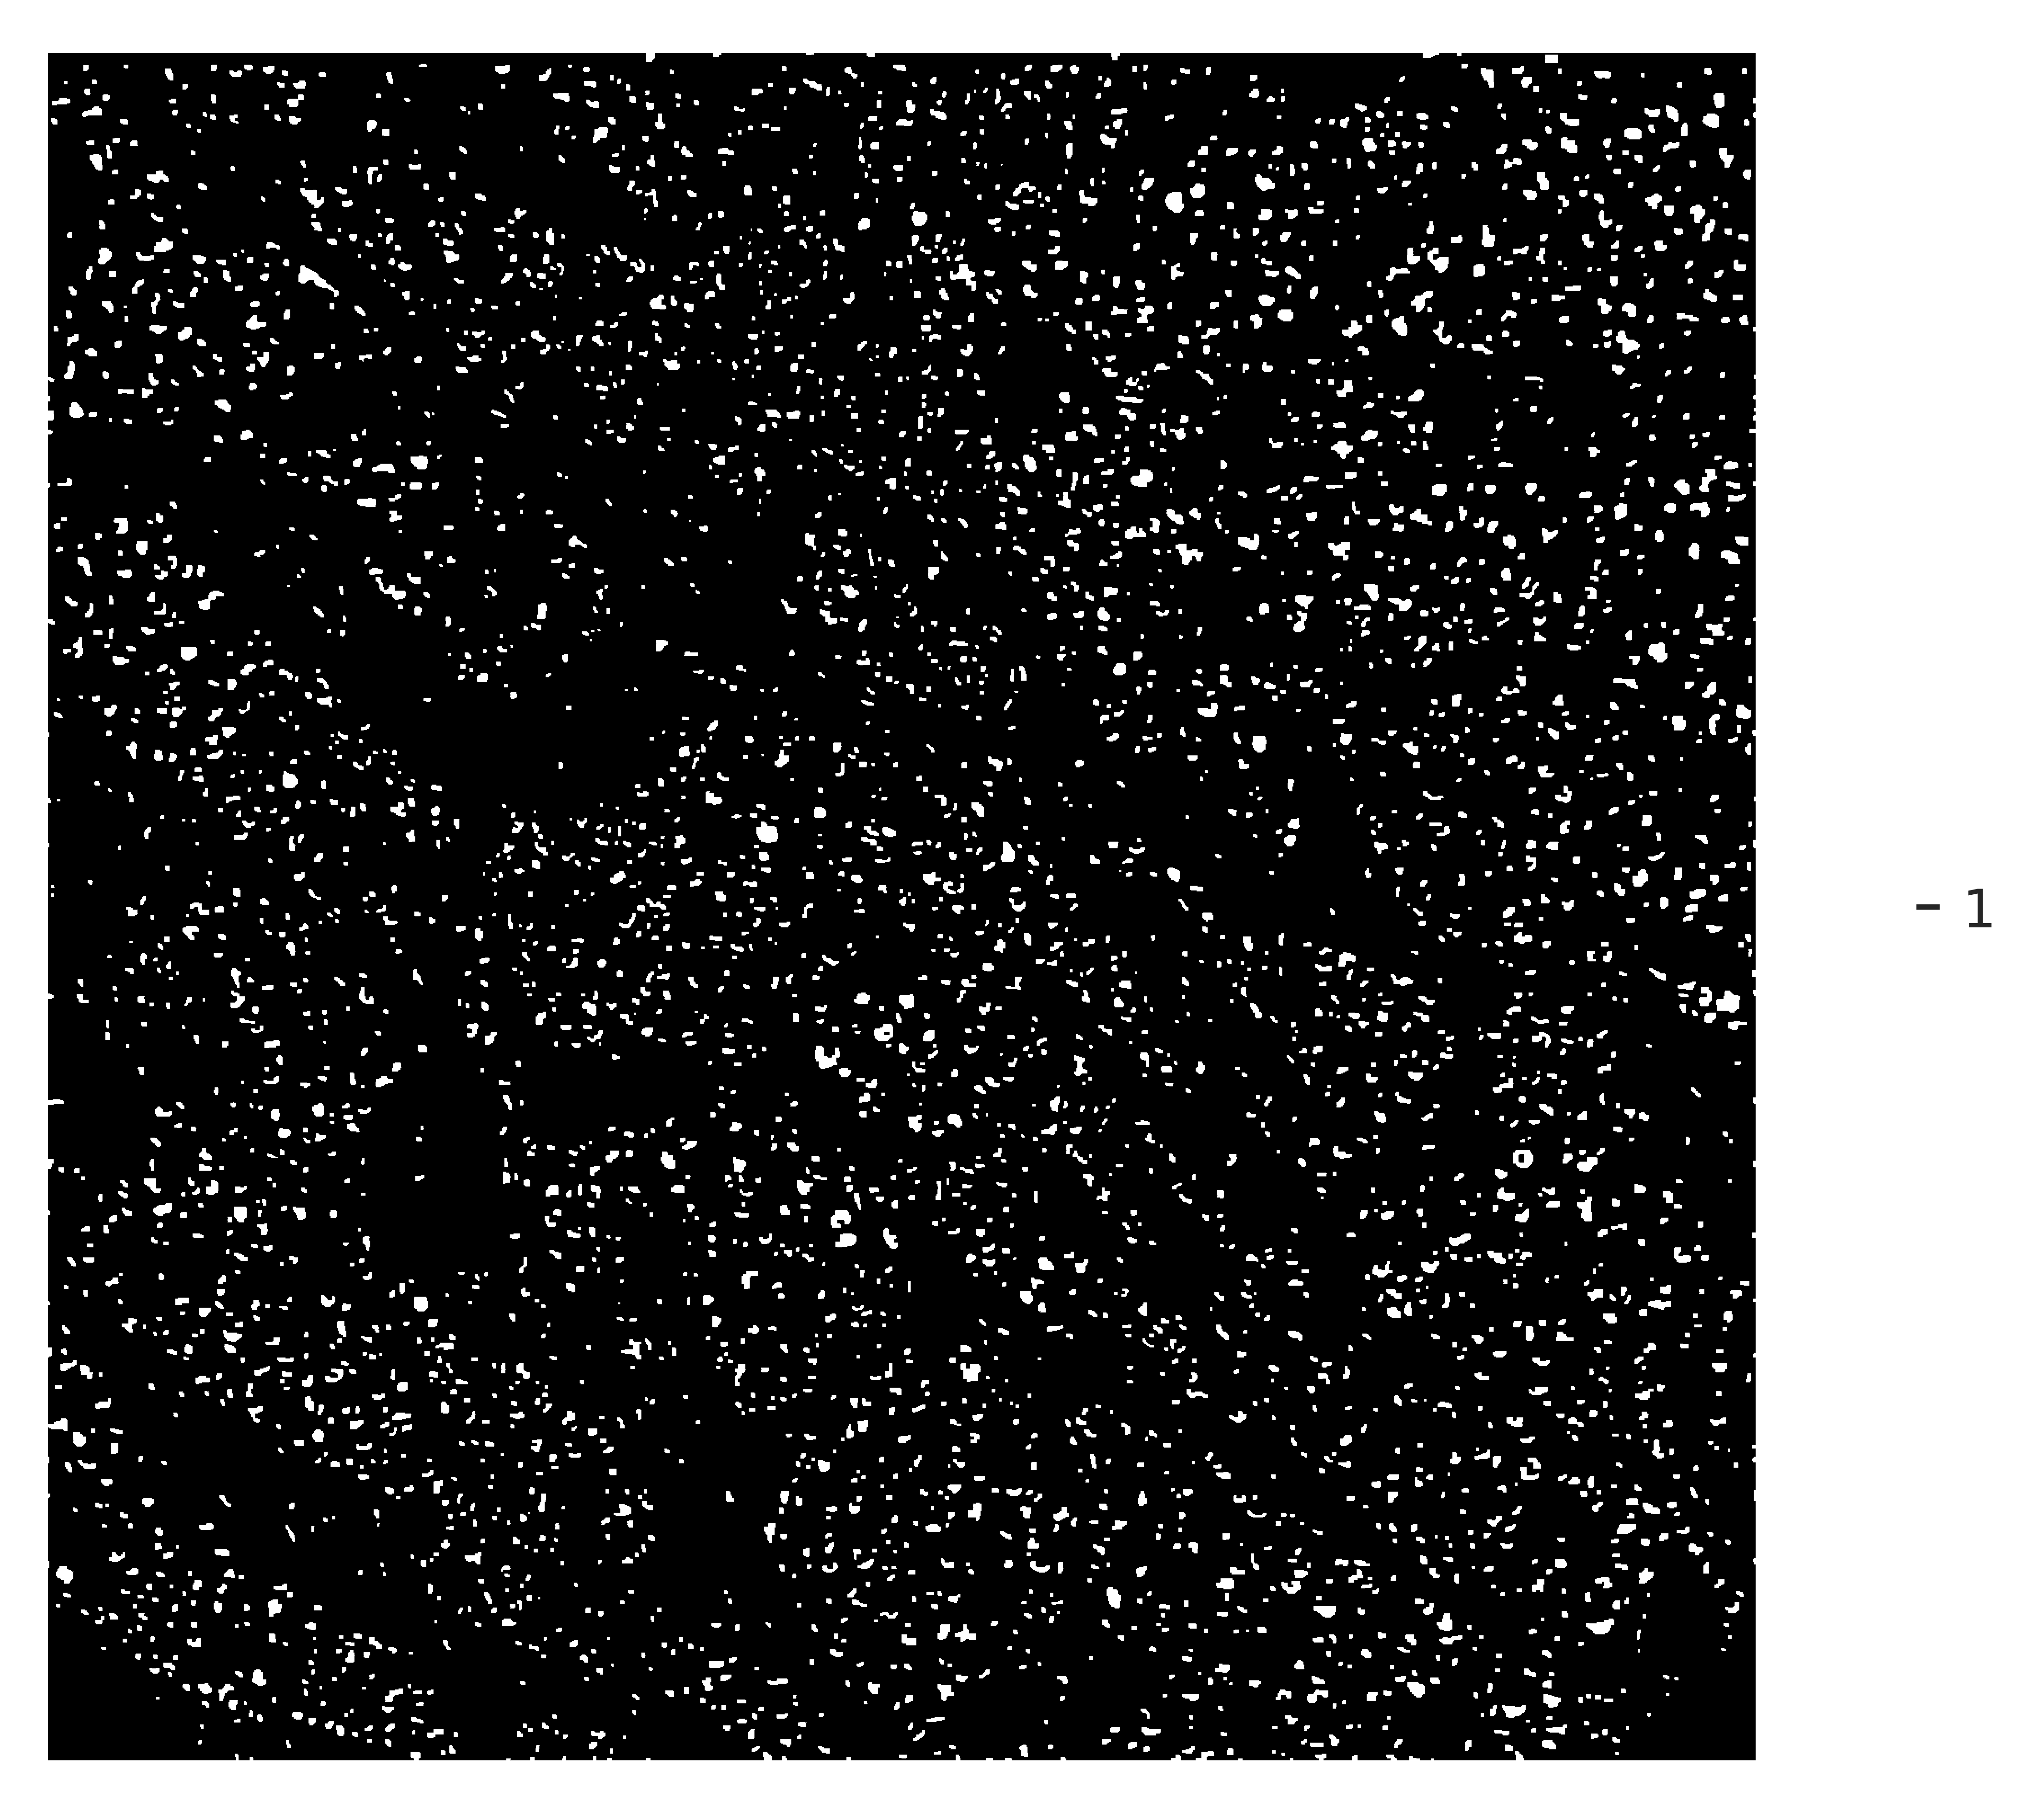

In [4]:
data_list = [
    'test_MIBI_2048_div10_top5_gaussian_gaussian_ada',
    'test_MIBI_P24_2048_div10_top5_gaussian_gaussian_ada'
]
p_list = ['P1','P24']
Segment_Cut_dict = {
    'P1':None,
    'P24':None
}
for i in range(len(data_list)):
    data = data_list[i]
    p = p_list[i]
#     load data
    a = SEAM.datasets.load_dataset_raw(data)
#     show SIMS-Cut result
    a = SEAM.tl.Cut(a)
    SEAM.pl.Cut(a,method='mask',save=None)
#     save SIMS-Cut result
    mask = np.zeros(shape=(2048*2048,))
    mask[a.uns['cell_pos']-1] = a.uns['cell_idx']
    Segment_Cut_dict[p] = mask.reshape(2048,2048)

In [9]:
with open('/home/yzy/projects/data_in_ipynb_revision/MIBI_segmentation/Segment_Cut.pickle', 'wb') as handle:
    pickle.dump(Segment_Cut_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    